# TOC 
 - [Imports](#imports)
 - [Graduation Rate](#grad_rate)
 - [Numeric Feature Correlation to Target](#corr)
 - [Graduation Rate vs. Total Student Count](#total_students)
 - [Graduation Rate vs. Low Income Student Count](#low_income)

<a id='imports'></a>

# Imports

In [30]:
import pandas as pd
import numpy as np
import sys, os
sys.path.append('../..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from src.preprocessing.preprocessing import years, paths, original_dict, df_dict, hs_df_dict
from src.preprocessing.preprocessing import create_sp_path_dictionary, import_multiple_sy_profiles

<a id='grad_rates'></a>

# Graduation Rates

The target of the model is the graduation rate of schools in the Chicago Public School System. 

In [32]:
df_dict['2018-2019'].shape

(141, 21)

In [33]:
hs_df_dict['2018-2019'].head()

,School_ID,Short_Name,Graduation_Rate_School,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Is_High_School,Dress_Code,Classroom_Languages,Transportation_El
5,609750,SIMPSON HS,15.4,34,34,4,3,25,9,0,0,0,0,0,0,0,0,True,False,Spanish,Pink
9,609754,CHICAGO MILITARY HS,85.7,295,211,27,18,188,100,4,0,0,0,0,3,0,0,True,True,Spanish,"Green, Red"
13,400051,NOBLE - NOBLE HS,89.4,660,552,93,65,74,565,8,5,4,0,0,3,0,1,True,True,Spanish,Blue
14,610506,TEAM HS,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,True,Spanish,"Green, Red"
15,609678,JONES HS,94.9,1910,713,103,21,228,564,748,273,6,0,0,80,11,0,True,False,"Chinese, French, Spanish","Blue, Brown, Pink, Red"


<a id='corr'></a>

# Numeric Feature Correlation to the Target

In [65]:
dfhs_201819 = hs_df_dict['2018-2019']

In [72]:
dfhs_201819.corr().loc['Student_Count_Total':,'Graduation_Rate_School'].abs().sort_values(ascending=False)

Student_Count_Total                        0.434469
Student_Count_Low_Income                   0.425583
Student_Count_Hispanic                     0.338306
perc_low_income                            0.287700
Student_Count_Multi                        0.267580
Student_Count_Native_American              0.262067
student_count^2                            0.259539
Student_Count_Asian                        0.247451
Student_Count_Black                        0.224458
high_low_inc                               0.221853
Student_Count_White                        0.210742
Student_Count_Special_Ed                   0.208873
Student_Count_Hawaiian_Pacific_Islander    0.198312
Student_Count_Ethnicity_Not_Available      0.158043
Student_Count_English_Learners             0.152553
Student_Count_Asian_Pacific_Islander       0.125403
Dress_Code                                 0.092294
high_low_inc_5bins                         0.085279
Student_Count_Other_Ethnicity                   NaN
Is_High_Scho

While the racial data is interesting, I will not be including that in the model. 

<a id='total_students'></a>

# Total Students

> Does how more total students correlate with higher or lower graduation rates?

In [39]:
dfhs_201819['Student_Count_Total'].mean()

707.1702127659574

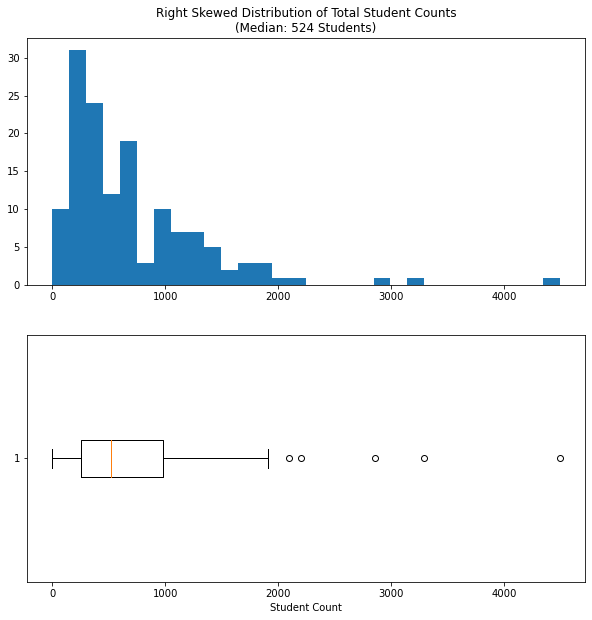

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].hist(dfhs_201819['Student_Count_Total'], bins=30)
ax[1].boxplot(dfhs_201819['Student_Count_Total'], vert=False)
ax[0].set_title(f"""Right Skewed Distribution of Total Student Counts
(Median: {round(dfhs_201819['Student_Count_Total'].median())} Students)""")
ax[1].set_xlabel('Student Count');

Text(0, 0.5, 'Graduation Rate')

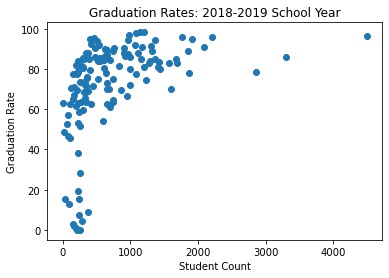

In [41]:
fig, ax = plt.subplots()
ax.scatter(dfhs_201819['Student_Count_Total'], dfhs_201819['Graduation_Rate_School'])
ax.set_title('Graduation Rates: 2018-2019 School Year')
ax.set_xlabel('Student Count')
ax.set_ylabel('Graduation Rate')

> There are a few schools with very low graduation rates which also have very low student counts. 

> There appears to be a positive correlation between total students and graduation rate, which is reinforced by the .4345 correlation below.

In [42]:
dfhs_201819[['Graduation_Rate_School', 'Student_Count_Total']].corr()

,Graduation_Rate_School,Student_Count_Total
Graduation_Rate_School,1.000000,0.434469
Student_Count_Total,0.434469,1.000000


> There also appears a curvature to the relationship, which may suggest the inclusion of a polynomial term in the model

In [43]:
dfhs_201819['student_count^2'] = dfhs_201819['Student_Count_Total']**2

In [44]:
dfhs_201819[['student_count^2', 'Graduation_Rate_School']].corr()

,student_count^2,Graduation_Rate_School
student_count^2,1.000000,0.259539
Graduation_Rate_School,0.259539,1.000000


> Basic correlation with squared term shows some correlation

<a id='low_income'></a>

# Does Number of low income students correlate with lower or higher graduation rates?

In [45]:
dfhs_201819['Student_Count_Low_Income'].sort_values()

14        0
24       18
5        34
179      50
61       70
       ... 
652    1523
520    1602
500    1752
634    1951
645    2536
Name: Student_Count_Low_Income, Length: 141, dtype: int64

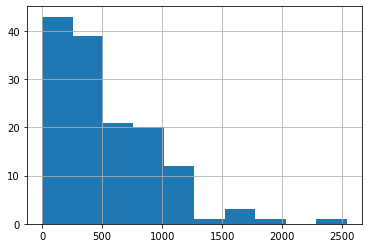

In [46]:
dfhs_201819['Student_Count_Low_Income'].hist()

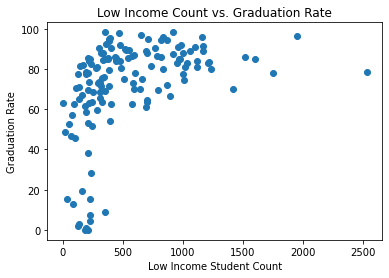

In [47]:
fig, ax = plt.subplots()
ax.scatter(dfhs_201819['Student_Count_Low_Income'], dfhs_201819['Graduation_Rate_School'])
ax.set_title('Low Income Count vs. Graduation Rate')
ax.set_xlabel('Low Income Student Count')
ax.set_ylabel('Graduation Rate');

In [48]:
dfhs_201819[['Student_Count_Low_Income','Graduation_Rate_School']].corr()

,Student_Count_Low_Income,Graduation_Rate_School
Student_Count_Low_Income,1.000000,0.425583
Graduation_Rate_School,0.425583,1.000000


There is a positive correlation between low income student count and graduation rate.  The scatter plot is very similar to the plot of Total students to low income students,.

In [49]:
dfhs_201819[['Student_Count_Low_Income','Student_Count_Total']].corr()

,Student_Count_Low_Income,Student_Count_Total
Student_Count_Low_Income,1.000000,0.898967
Student_Count_Total,0.898967,1.000000


As we see from the correlation above, there is a strong positive correlation between total student count and low income student count. 

Intuitively, the more students there are in a school, the more low income students there are.

## Percent Low Income

In [50]:
# Calculate % low income
dfhs_201819['perc_low_income'] = dfhs_201819['Student_Count_Low_Income']/dfhs_201819['Student_Count_Total']

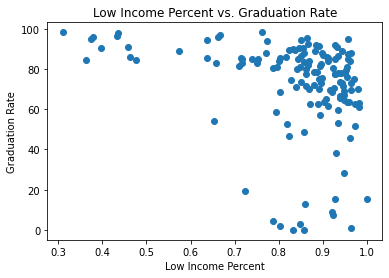

In [51]:
fig, ax = plt.subplots()
ax.scatter(dfhs_201819['perc_low_income'], dfhs_201819['Graduation_Rate_School'])
ax.set_title('Low Income Percent vs. Graduation Rate')
ax.set_xlabel('Low Income Percent')
ax.set_ylabel('Graduation Rate');

In [52]:
dfhs_201819[['perc_low_income','Graduation_Rate_School']].corr()

,perc_low_income,Graduation_Rate_School
perc_low_income,1.0000,-0.2877
Graduation_Rate_School,-0.2877,1.0000


In [53]:
dfhs_201819[['perc_low_income','Student_Count_Total']].corr()

,perc_low_income,Student_Count_Total
perc_low_income,1.000000,-0.505144
Student_Count_Total,-0.505144,1.000000


There is a negative correlation between percentage low income students and total student count.  As the student population grows, there is a lower ratio of low income students to high income students.  In other words, schools with smaller populations tend to have larger relative proportions of low-income students.

> I'll begin investigating the difference between schools that fall into two bins

## Binning Low Income Populations

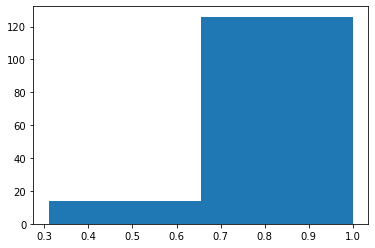

In [54]:
fig, ax = plt.subplots()

hist_2bin = ax.hist(dfhs_201819['perc_low_income'], bins=2)

In [55]:
hist_2bin[1][1]

0.6547826086956521

In [56]:
# Set high_low_inc value to a binary where 1 is > the separation of the binary histogram
dfhs_201819['high_low_inc'] = dfhs_201819['perc_low_income'].apply(lambda x: x > hist_2bin[1][1]).astype(int)

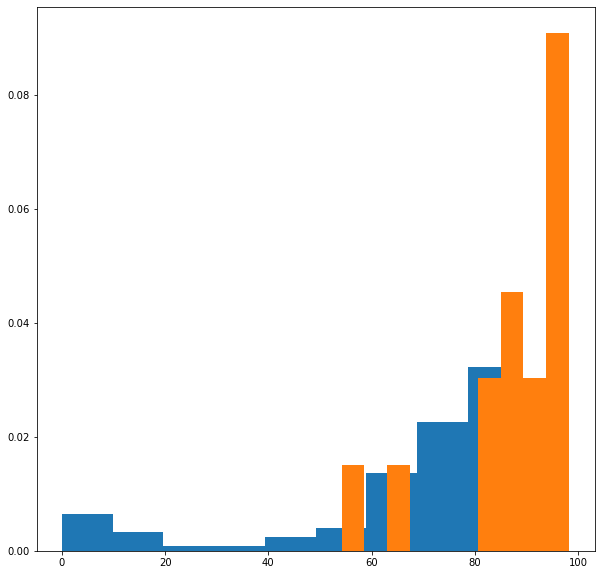

In [57]:
high_low_inc, ax = plt.subplots(figsize=(10,10))
high_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==1]['Graduation_Rate_School']
low_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==0]['Graduation_Rate_School']

ax.hist(high_low_inc_gradrates, density=True)
ax.hist(low_low_inc_gradrates, density=True);

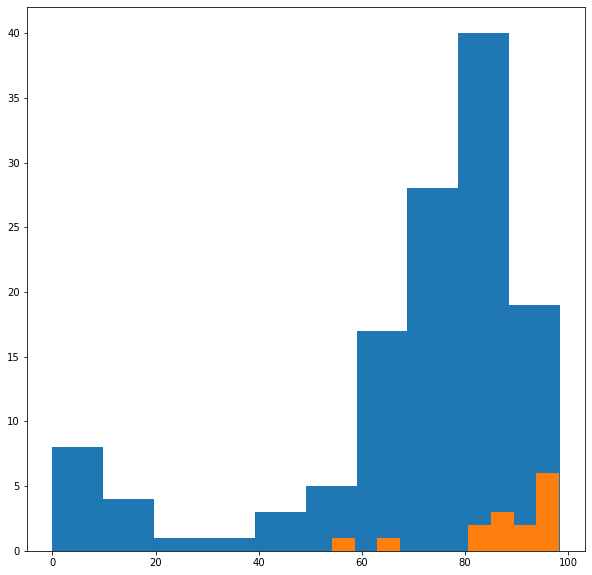

In [58]:
high_low_inc, ax = plt.subplots(figsize=(10,10))
high_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==1]['Graduation_Rate_School']
low_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==0]['Graduation_Rate_School']

ax.hist(high_low_inc_gradrates, density=False)
ax.hist(low_low_inc_gradrates, density=False);

> This grouping has too great a class imbalance to prove useful, most likely. 

I will try a grouping of high and low with the groupings split according to the histogram below.

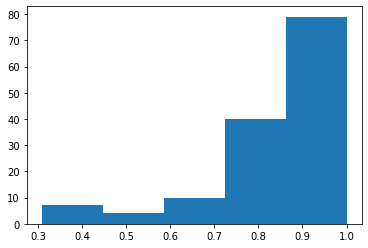

In [59]:
fig, ax = plt.subplots()

low_inc_5bins = ax.hist(dfhs_201819['perc_low_income'], bins=5)

In [60]:
low_inc_5bins[1][-2]

0.8619130434782609

In [61]:
dfhs_201819['high_low_inc_5bins'] = dfhs_201819['perc_low_income'].apply(lambda x: x > low_inc_5bins[1][-2]).astype(int)

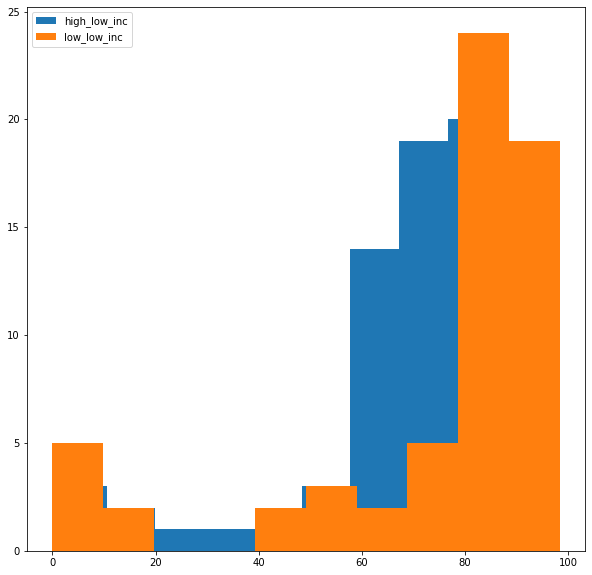

In [62]:
high_low_inc, ax = plt.subplots(figsize=(10,10))
high_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc_5bins']==1]['Graduation_Rate_School']
low_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc_5bins']==0]['Graduation_Rate_School']

ax.hist(high_low_inc_gradrates, density=False, label='high_low_inc')
ax.hist(low_low_inc_gradrates, density=False, label='low_low_inc')
ax.legend();

This looks a bit more interesting.  There is a better class balance and there does appear to be a difference in these distributions.

In [63]:
high_low_inc_gradrates.mean()

70.14810126582277

In [64]:
low_low_inc_gradrates.mean()

74.19354838709677